In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

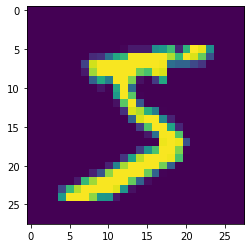

In [4]:
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_images[0])
print(train_labels[0])

In [5]:
train_images= train_images/255.0
test_images= test_images/255.0

In [6]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.998):
      print('\n Reached 60% accuracy so stopped training')
      self.model.stop_training=True

In [7]:
callbacks= mycallback()
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation= tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation= tf.nn.softmax)])

In [8]:
model.compile(optimizer= tf.optimizers.Adam(),loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])
history= model.fit(train_images,train_labels,epochs=10,callbacks= [callbacks])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2602 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1168 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0797 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0596 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0457 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0367 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0296 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

In [9]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9764


[0.08580530434846878, 0.9764000177383423]

In [10]:
classifications= model.predict(test_images)
print(classifications[0])
print(np.argmax(classifications[0]))


[4.9510348e-08 2.8138483e-10 7.7614132e-08 6.4110086e-06 5.3607339e-15 3.3813956e-09 4.9639641e-14 9.9999321e-01 2.0853451e-08 2.0549219e-07]
7


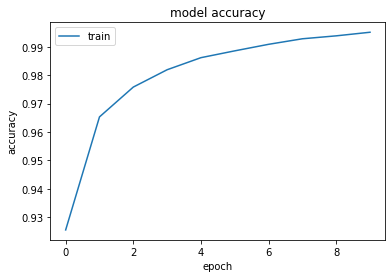

In [11]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

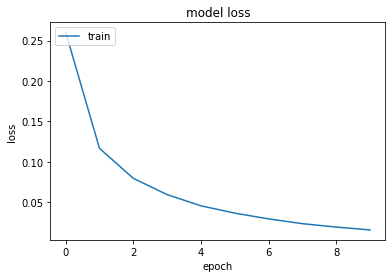

In [12]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.96      0.98       982
           5       0.99      0.94      0.96       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
labels = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

cm=confusion_matrix(test_labels,p)                        
print(cm)

[[ 970    0    0    2    0    1    4    1    1    1]
 [   0 1129    2    1    0    1    1    0    1    0]
 [   2    3 1009    3    1    0    2    5    7    0]
 [   0    0    3  997    0    0    0    4    3    3]
 [   1    0    7    0  946    3    3    6    2   14]
 [   2    0    0   33    0  840    5    2    7    3]
 [   3    2    5    1    1    2  944    0    0    0]
 [   1    6    9    1    0    0    0 1005    3    3]
 [   3    0    5    5    4    3    2    4  944    4]
 [   1    5    1    8    4    2    2    6    0  980]]


In [16]:
model.save('mnist_nn.h5')

In [17]:
!pip install streamlit  
  


In [18]:
!pip install pyngrok

In [19]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation= True)
def load_model():
  model= tf.keras.models.load_model('/content/mnist_nn.h5')
  return model
model= load_model()
st.write(""" # Image classification """) 
file= st.file_uploader("Please upload an image", type= ['jpg','png','jpeg'])
import cv2
from PIL import Image,ImageOps
import numpy as np
def import_and_predict(image_data,model):
  size= (28,28)
  image= ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img= np.asarray(image)
  img_reshape= img[np.newaxis,...]
  prediction= model.predict(img_reshape)
  return prediction
if file is None:
  st.text('Pls upload an img file')
else:
  image= Image.open(file)
  st.image(image, use_column_width= True)
  predictions= import_and_predict(image, model)
  classes= ['0','1','2','3','4','5','6','7','8','9']
  string= 'This image may be:'+classes[np.argmax(predictions)]
  st.success(string)

Overwriting app.py


In [20]:
!ngrok authtoken 1ge0z8B2k4lruRa4D7E782iDhfa_4PfxsNzs4VzbjfDuaLrTZ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [21]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [22]:
from pyngrok import ngrok
url= ngrok.connect(port= 8501)
url

'http://8e14b7a52638.ngrok.io'

In [23]:
!cat '/content/nohup.out'

2020-09-01 11:10:27.013321: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.201.207.207:8501

2020-09-01 11:10:28.108439: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-01 11:10:28.110827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-01 11:10:28.111350: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-09-01 11:10:28.111377: I tensorflow/stream_executor/platform/